In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [4]:
def plot_distribution(app_name: str):
    merged_data = pd.read_csv(f'result/{app_name}/{app_name}_combined.csv')

    # Define the custom color (R: 146, G: 200, B: 185)
    custom_color = "#2E9D7C"

    # Set up the style for plots with the custom color
    sns.set_style("whitegrid")

    # Plotting
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot rating distribution
    sns.histplot(data=merged_data, x='rating', bins=5, ax=axes[0, 0], kde=True, color=custom_color)
    axes[0, 0].set_title('Rating Distribution')
    axes[0, 0].set_xlabel('Rating')
    axes[0, 0].set_ylabel('Count')

    # Plot polarity distribution
    sns.histplot(data=merged_data, x='polarity', bins=10, ax=axes[0, 1], kde=True, color=custom_color)
    axes[0, 1].set_title('Polarity Distribution')
    axes[0, 1].set_xlabel('Polarity')
    axes[0, 1].set_ylabel('Count')

    # Plot subjectivity distribution
    sns.histplot(data=merged_data, x='subjectivity', bins=10, ax=axes[1, 0], kde=True, color=custom_color)
    axes[1, 0].set_title('Subjectivity Distribution')
    axes[1, 0].set_xlabel('Subjectivity')
    axes[1, 0].set_ylabel('Count')

    # Plot similarity score distribution
    sns.histplot(data=merged_data, x='similarity score', bins=10, ax=axes[1, 1], kde=True, color=custom_color)
    axes[1, 1].set_title('Similarity Score Distribution')
    axes[1, 1].set_xlabel('Similarity Score')
    axes[1, 1].set_ylabel('Count')

    # Adjust layout
    plt.tight_layout()

    # Save the entire layout as a single image
    fig.savefig(f'result/{app_name}/{app_name}.png')
    
    plt.show()

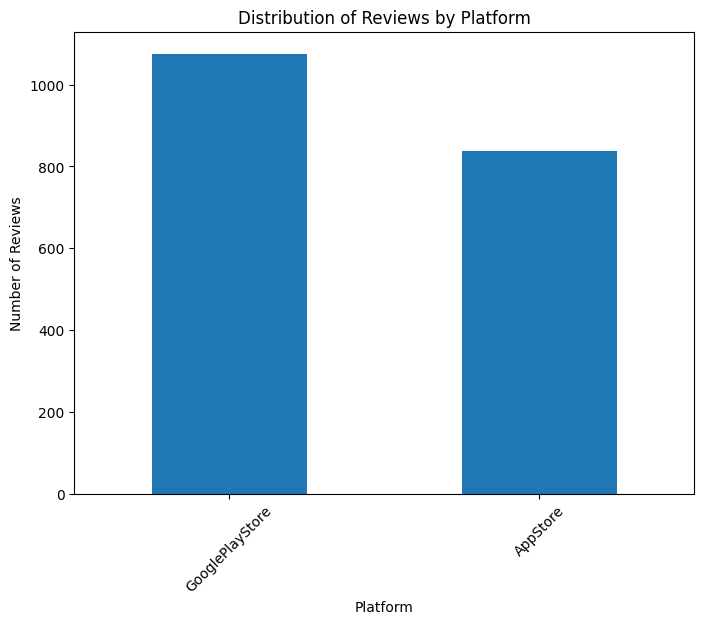

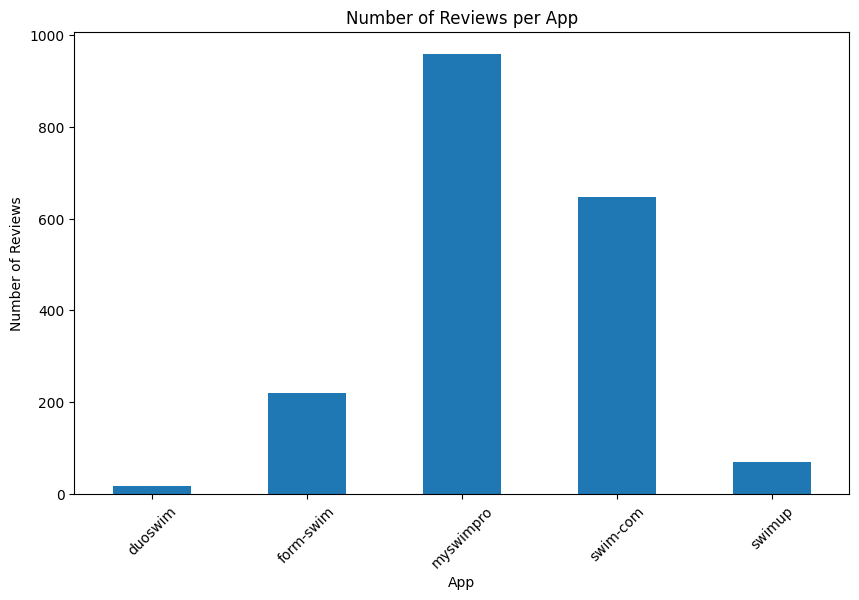

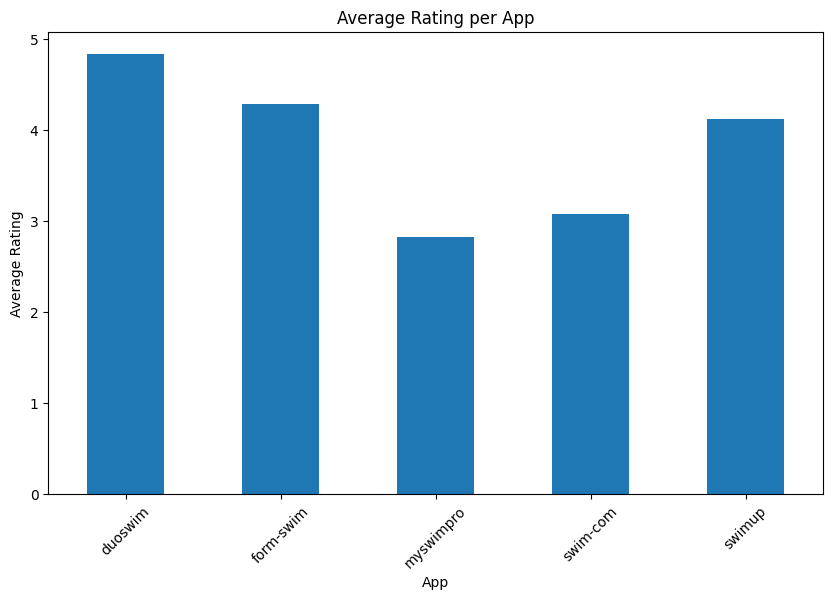

In [2]:
df = pd.read_csv('new_result/all_concat.csv')

# 分析平台分布
platform_distribution = df['platform'].value_counts()

# 可视化平台分布
plt.figure(figsize=(8, 6))
platform_distribution.plot(kind='bar')
plt.title('Distribution of Reviews by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# 分析每个App的评论数量和平均评分
app_analysis = df.groupby('app').agg({'review': 'count', 'rating': 'mean'})

# 可视化每个App的评论数量
plt.figure(figsize=(10, 6))
app_analysis['review'].plot(kind='bar')
plt.title('Number of Reviews per App')
plt.xlabel('App')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# 可视化每个App的平均评分
plt.figure(figsize=(10, 6))
app_analysis['rating'].plot(kind='bar')
plt.title('Average Rating per App')
plt.xlabel('App')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


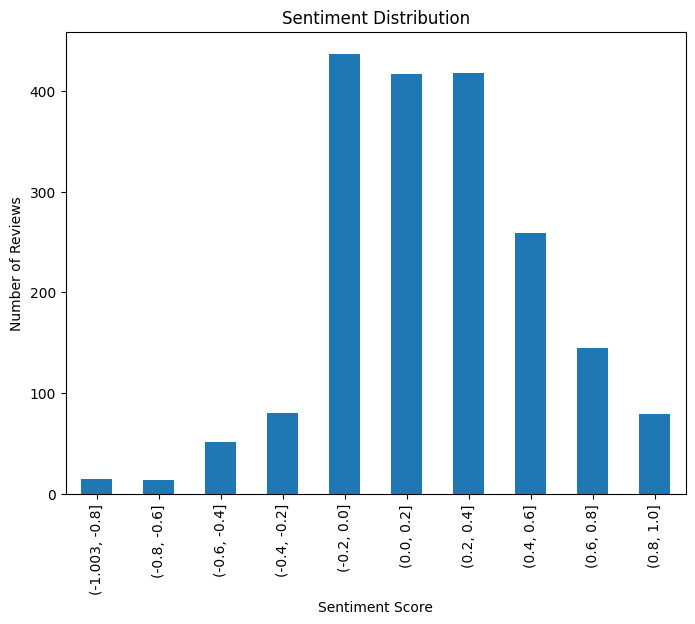

In [17]:
df = pd.read_csv('new_result/all_concat.csv')

# 情感分析
df['sentiment'] = df['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# 计算情感得分的分布（根据需要更改分箱数量）
sentiment_counts = df['sentiment'].value_counts(bins=10).sort_index()

# 绘制情感分析结果的直方图
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.show()

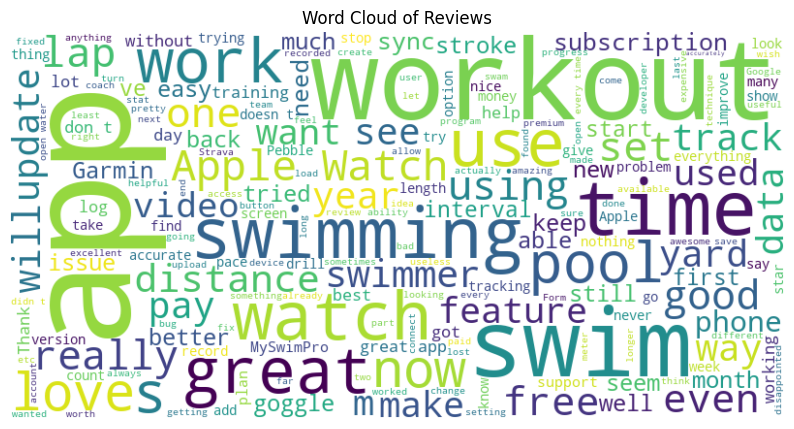

In [13]:
# 文字云生成
text = ' '.join(str(review) for review in df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 绘制文字云
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

/var/folders/38/1tx9b7sn70xck3_kfmth5qyr0000gn/T/ipykernel_6441/2096317835.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


count    1915.000000
mean        3.140470
std         1.726796
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64
platform
GooglePlayStore    1076
AppStore            839
Name: count, dtype: int64
                     mean       std
platform                           
AppStore         3.097735  1.697248
GooglePlayStore  3.173792  1.749552


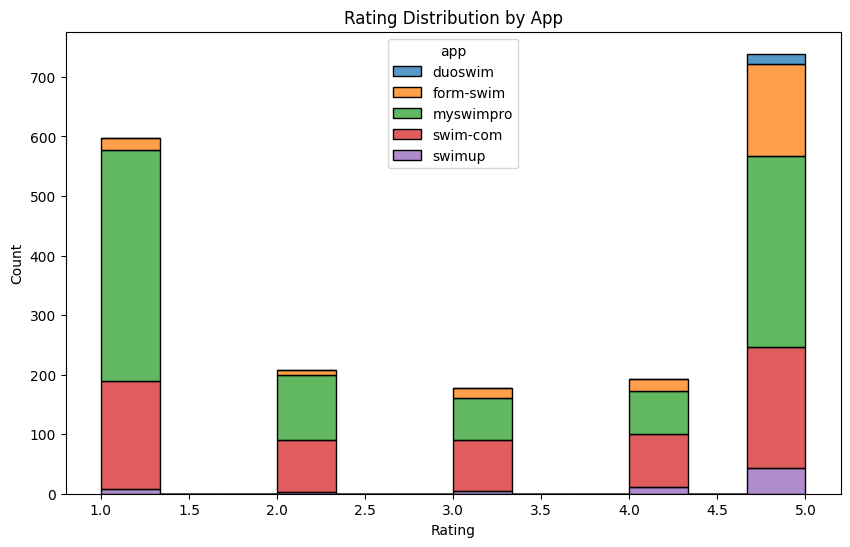

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('new_result/all_concat.csv')
df['date'] = pd.to_datetime(df['date'])

# 敘述性統計
print(df['rating'].describe())

# 平台分布
print(df['platform'].value_counts())

# 不同平台的平均評分和標準差
platform_rating_stats = df.groupby('platform')['rating'].agg(['mean', 'std'])
print(platform_rating_stats)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rating', hue='app', multiple='stack')
plt.title('Rating Distribution by App')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


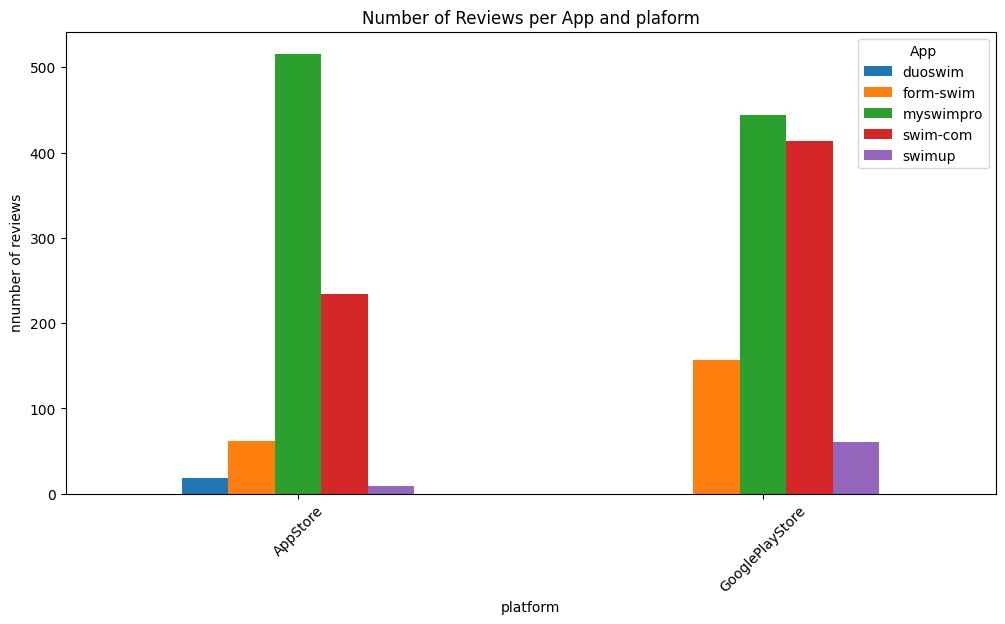

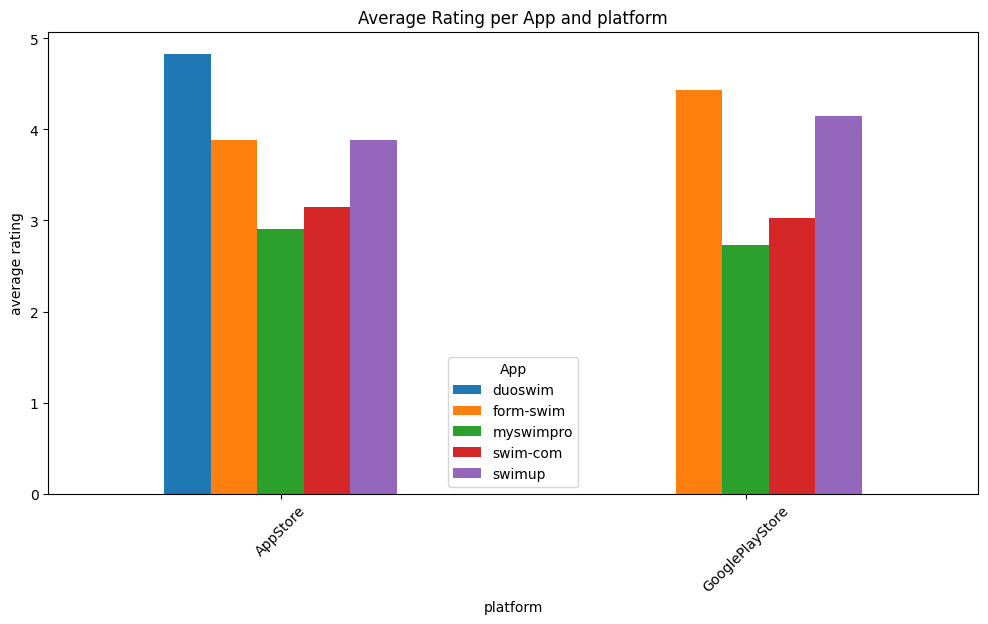

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 加載數據
df = pd.read_csv('new_result/all_concat.csv')

# 將日期列轉換為datetime類型
df['date'] = pd.to_datetime(df['date'])

# 按平台和App分組，計算評論數量
review_counts = df.groupby(['platform', 'app']).size().unstack(fill_value=0)

# 按平台和App分組，計算平均評分
average_ratings = df.groupby(['platform', 'app'])['rating'].mean().unstack(fill_value=0)

# 可視化評論數量
review_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Reviews per App and plaform')
plt.ylabel('nnumber of reviews')
plt.xticks(rotation=45)
plt.legend(title='App')
plt.show()

# 可視化平均評分
average_ratings.plot(kind='bar', figsize=(12, 6))
plt.title('Average Rating per App and platform')
plt.ylabel('average rating')
plt.xticks(rotation=45)
plt.legend(title='App')
plt.show()


In [13]:
from scipy import stats

df = pd.read_csv('new_result/all_concat.csv')

app_names = df['app'].unique()[:3]

# ANOVA
f_value, p_value = stats.f_oneway(
    df[df['app'] == app_names[0]]['rating'].dropna(), 
    df[df['app'] == app_names[1]]['rating'].dropna(), 
    df[df['app'] == app_names[2]]['rating'].dropna()
)

print(f'ANOVA test results: F-value = {f_value}, P-value = {p_value}')

if p_value < 0.05:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")



ANOVA test results: F-value = 76.34364442684252, P-value = 6.299801011840683e-32
There is a significant difference between the groups.
